In [21]:
import numpy as np
import sympy as sp

Resolver analíticamente con sympy la siguientes ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [27]:
sp.var('t')
x=sp.Function('x')
eq=x(t).diff(t)-x(t)/(t+1)
sol=sp.dsolve(eq,x(t))
sol

Eq(x(t), C1*(t + 1))

Resuelva analíticamente la siguiente ecuación diferencial
$$\frac{dC(t)}{dt}=rC(t)$$

donde la equivalencia entre la tasa de interés compuesta $i$ y la tasa de interés instantánea $r$ viene dada por

$$e^r=1+i.$$

In [26]:
sp.var('t')
C=sp.Function('C')
#i=0.008
sp.var('i')
r=sp.log(1+i)
#eq=sp.Derivative(C(t),t)-r*C(t) # Ecuación igualada a cero
eq=C(t).diff(t)-r*C(t)
sol=sp.dsolve(eq,C(t))
sol.subs('C1',10000)
#sol.subs({'C1':10000,'i':0.008})

Eq(C(t), 10000*exp(t*log(i + 1)))

#### Oscilador armónico símple

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

Encuentre la solución numérica y simbólica para un oscilador armónico simple:

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0}^2 = \frac{k}{m}\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align}

In [41]:
sp.lambdify?

C:\Users\usuario\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


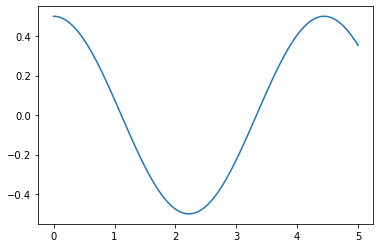

In [46]:
sp.var('t')
x=sp.Function('x')
w=sp.sqrt(k/m)
eq=x(t).diff(t,2)+w**2*x(t)
sol=sp.dsolve(eq,x(t))
solnum=sp.lambdify(t,sol.args[1].subs({'C1':0.5,'C2':0,'k':2,'m':1}),'numpy')
tnum=np.linspace(0,5,100)
plt.plot(tnum,solnum(tnum))

\begin{eqnarray}
\dot{x}_1&=&x_2\\
\dot{x}_2&=&-\omega_0^2x_1
\end{eqnarray}

In [32]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [39]:
def f(x,t,w):
    dx=[0,0]
    dx[0]=x[1]
    dx[1]=-w**2*x[0]
    return dx

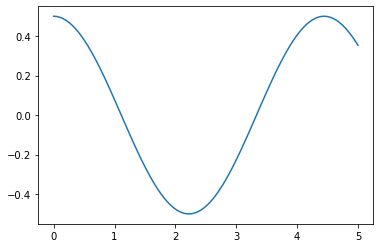

In [40]:
x0=np.array([0.5,0])
t=np.linspace(0,5,100)
w0=np.sqrt(2/1)
x=odeint(f,x0,t,args=(w0,))
x1=x[:,0]
x2=x[:,1]
plt.plot(t,x1)